## Normal Distrution

* Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

### Checking for Skewness of the data

* We Generally check Askewness in the Target Columns of the data.
* Skewness is a state of distribution where the distribution is highly biased towards the right or left side of the plot.

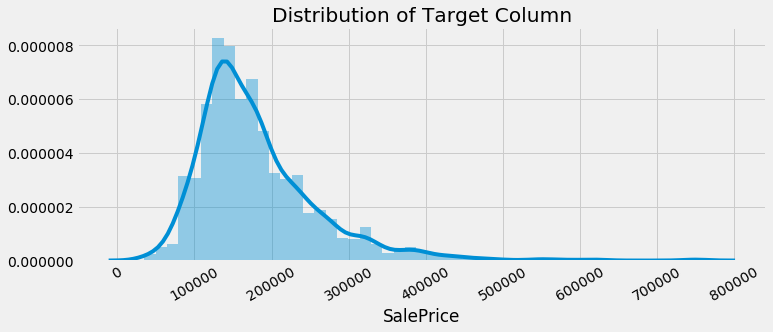

In [11]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(data['SalePrice'])
plt.title('Distribution of Target Column')
plt.show()

* The distribution for our target variable aka SalePrice doesn't resemble a normal distribution, it is skewed to the right
* If we remove the outliers, it'd somewhat resemble a Normal Dstribution

## Z-Score

* The number of standard deviations from the mean is also called the "Standard Score", "sigma" or "z-score".
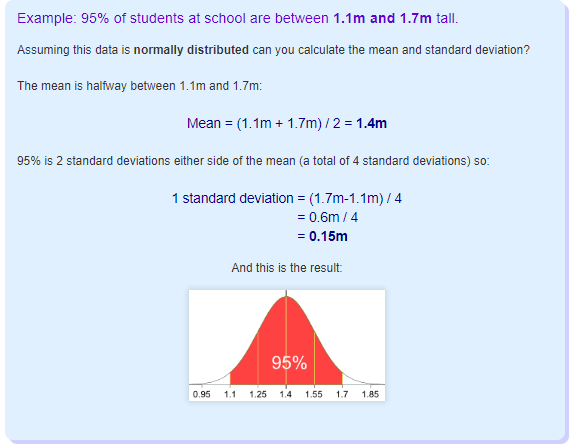
* Let's take an example to better understand the meaning of z-score
    * Let's Suppose the average height of a Student in a class is 1.4 meters
    * In that same class one of the students is 1.85m tall
    * You can see on the bell curve that 1.85m is 3 standard deviations from the mean of 1.4.
    * so, the student with 1.85m height has a **z-score" of 3.0**.

## Central Limit Theorem

The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.

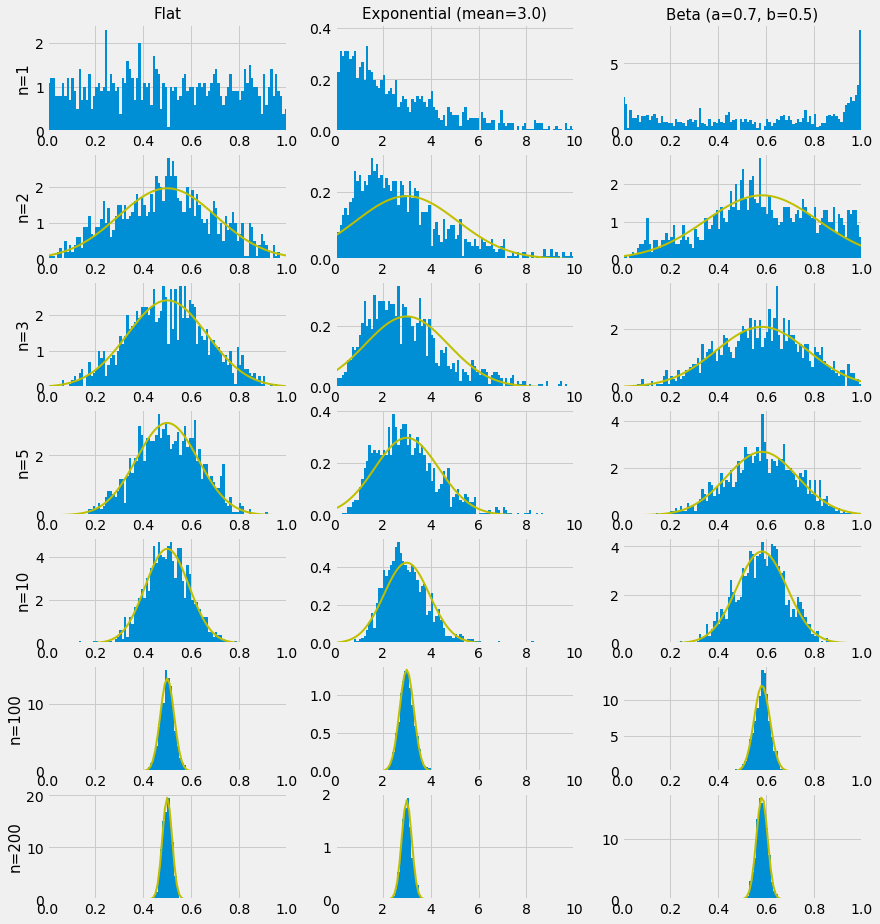

In [14]:
# lets check Central Limit theorem for this data

# provides capability to define function with partial arguments
from functools import partial

# number of samples to average over.
n=np.array([1, 2, 3, 5, 10, 100, 200])

# number of times samples of size n are taken. Try varying this number.
N = 1000

# number of bin boundaries on plots
nobb=101

# mean of exponential distribution
exp_mean=3

# parameters of beta distribution
a,b=0.7,0.5 

dist=[partial(np.random.random), 
      partial(np.random.exponential, exp_mean),
      partial(np.random.beta, a, b)]

# lets define the title names.
title_names=["Flat",
             "Exponential (mean=%.1f)" % exp_mean, 
             "Beta (a=%.1f, b=%.1f)" % (a,b)]

# ranges of the three distributions
drange=np.array([[0,1],[0,10],[0,1]]) 

# means of the three distributions
means=np.array([0.5,exp_mean,a/(a+b)])

# variances of the three distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) 

# generates random samples in the specified ranges for the respective distributions.
binrange=np.array([np.linspace(p,q,nobb) for p,q in drange]) 
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

 # loop over number of n samples to average over
for i in range(ln):
     # loop over the different distributions
    for j in range(ld):
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],normed=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()


In the graphs above the yellow curve is the predicted Gaussian distribution from the Central Limit Thereom. Notice that the rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. Also,

the mean of the Gaussian distribution is the same as the original parent distribution,
the width of the Gaussian distribution varies with sample size as $1/\sqrt{n}$.

## Confidence Interval

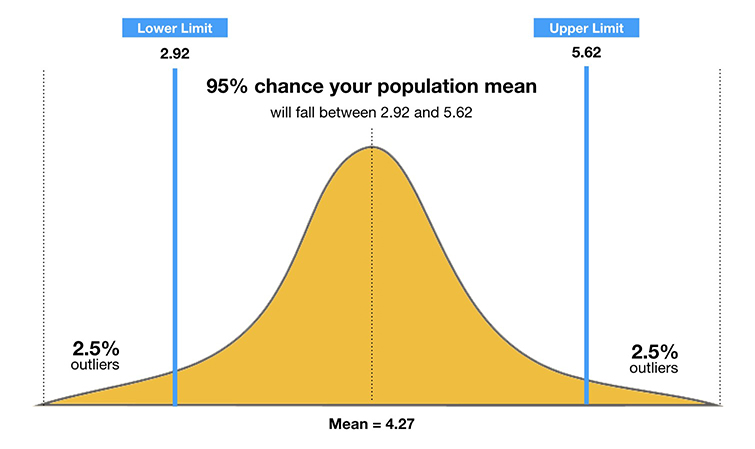


**Confidence Interval (CI)** is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposed range.


## Hypothesis Testing

* $Statistical Hypothesis$, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. A statistical hypothesis test is a method of statistical inference.

### Null Hypothesis

* In Inferential Statistics, **The Null Hypothesis is a general statement or default position that there is no relationship between two measured phenomena or no association among groups.**

* Statistical hypothesis tests are based on a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing.

* Therefore, in our case the Null Hypothesis would be:
**The Mean of House Prices in OldTown is not different from the houses of other neighborhoods**

### Alternate Hypothesis

* The alternate hypothesis is just an alternative to the null. For example, if your null is **I'm going to win up to 1000** then your alternate is **I'm going to win more than 1000.** Basically, you're looking at whether there's enough change (with the alternate hypothesis) to be able to reject the null hypothesis

###  The Null Hypothesis is assumed to be true and Statistical evidence is required to reject it in favor of an Alternative Hypothesis.

### P Value

* In statistical hypothesis testing, **the p-value or probability value** is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct. 

* So now say that we have put a significance (α) = 0.05
* This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true
